# SRS - the shock response spectrum

First, do some imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyyeti import srs

Some settings specifically for the jupyter notebook. This and other notebooks are available here: ``kittyhawk:/home/loads/twidrick/code/pyyeti/docs/tutorials``.

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [8.0, 6.0]
plt.rcParams['savefig.dpi'] = 100.

#### Compute an SRS of a half cycle square wave input
The SRS routine has many options, most of which are set to sensible defaults. For this demo, we'll mostly use the defaults. Note that parallel processing is default on non-Windows systems; on Windows, the default is to not use parallel processing because it only seems to slow things down -- I'm not certain why. Consult the documentation to learn more about the options available for computing SRS's.

In [3]:
sig = np.zeros(1000)
sig[10:200] = 1.
sr = 1000.
freq = np.arange(.1, 100, .1)
Q = 25
sh = srs.srs(sig, sr, freq, Q)

Plot time signal and resulting SRS:

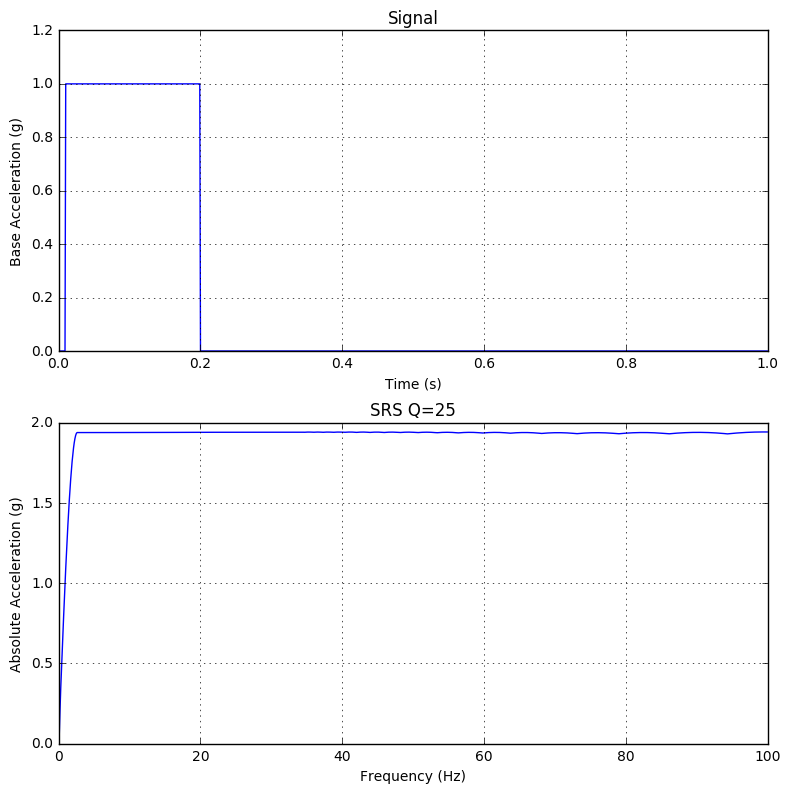

In [4]:
plt.figure(figsize=(8, 8))
t = np.arange(len(sig))/sr

plt.subplot(211)
plt.plot(t, sig)
plt.ylim(0, 1.2)
plt.title('Signal')
plt.xlabel('Time (s)')
plt.ylabel('Base Acceleration (g)')
plt.grid()

plt.subplot(212)
plt.plot(freq, sh)
plt.title('SRS Q={:g}'.format(Q))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Absolute Acceleration (g)')
plt.grid()
plt.tight_layout()

You can also get the response histories. This output is a dict with members: 't', 'hist', 'sr'. The 'hist' value is a 3D array to accomodate multiple input signals: ``(nsignals x len(time) x len(freq))``. The following plots a couple different frequencies for illustration:

In [5]:
sh, resp = srs.srs(sig, sr, freq, Q, getresp=1)
resp['hist'].shape

(2000, 1, 999)

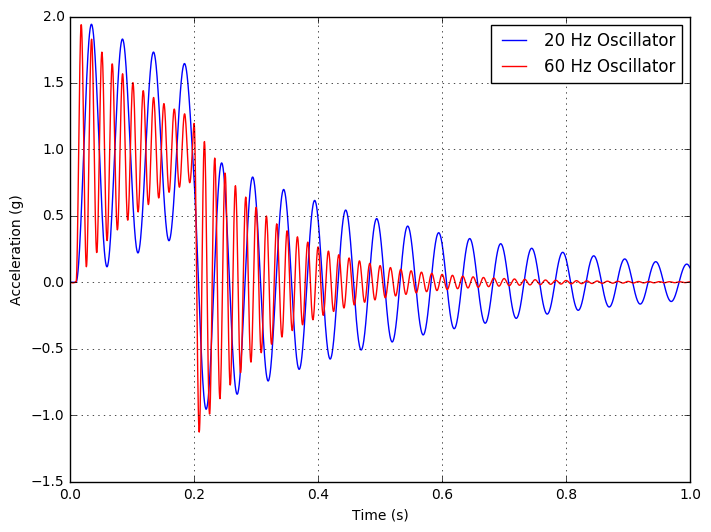

In [6]:
for j in np.searchsorted(freq, [20., 60.]):
    plt.plot(resp['t'], resp['hist'][:, 0, j],
             label='{:g} Hz Oscillator'.format(freq[j]))
plt.legend(loc='best')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (g)')
plt.grid()

---
#### Compare the different roll-off methods.
The recommendation is to use either the "lanczos" or "fft" methods.

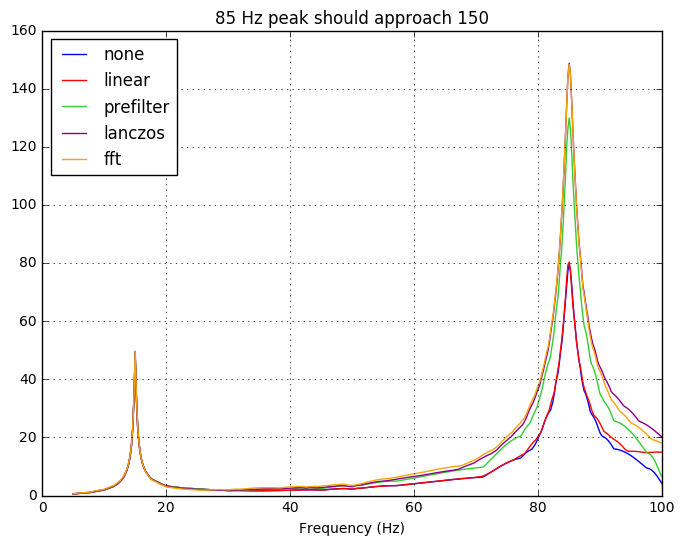

In [7]:
sr = 200
t = np.arange(0, 5, 1/sr)
sig = np.sin(2*np.pi*15*t) + 3*np.sin(2*np.pi*85*t)
Q = 50
frq = np.linspace(5, 100, 476)
for meth in ['none', 'linear', 'prefilter', 'lanczos', 'fft']:
    sh = srs.srs(sig, sr, frq, Q, rolloff=meth)
    plt.plot(frq, sh, label=meth)
plt.legend(loc='best')
ttl = '85 Hz peak should approach 150'
plt.title(ttl)
plt.xlabel('Frequency (Hz)')
plt.grid()

Rolloff method doesn't matter if your points-per-cycle (`ppc`) value is too low. Note that the "prefilter" method does not depend on `ppc`:

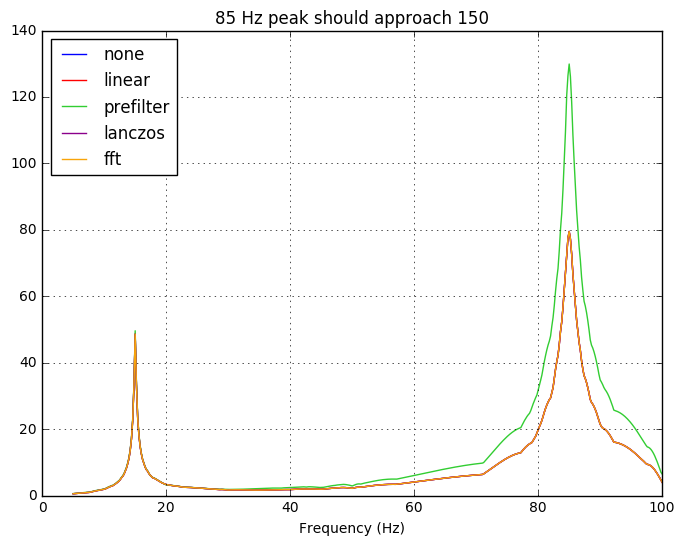

In [8]:
for meth in ['none', 'linear', 'prefilter', 'lanczos', 'fft']:
    sh = srs.srs(sig, sr, frq, Q, rolloff=meth, ppc=2)
    plt.plot(frq, sh, label=meth)
plt.legend(loc='best')
ttl = '85 Hz peak should approach 150'
plt.title(ttl)
plt.xlabel('Frequency (Hz)')
plt.grid()